In [9]:
#!http://benalexkeen.com/scoring-classifier-models-using-scikit-learn/

In [11]:
from sklearn.metrics import accuracy_score

# True class
y = [0, 0, 1, 1, 0]
# Predicted class
y_hat = [0, 1, 1, 0, 0]

# 60% accuracy
accuracy_score(y, y_hat)

0.59999999999999998

In [12]:
# True class
y = [0, 1, 2, 1, 0]
# Predicted class
y_hat = [0, 2, 2, 1, 0]

# 80% accuracy
accuracy_score(y, y_hat)

0.80000000000000004

In [13]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Binary Classification
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[112,  12],
       [ 11, 115]])

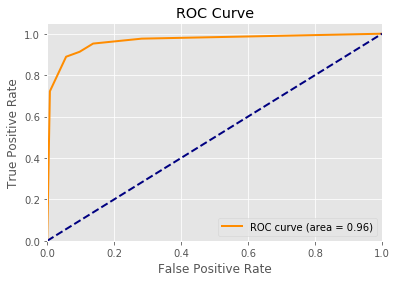

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

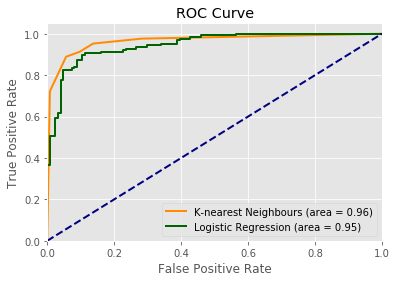

In [16]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_predict_probabilities = lr_model.predict_proba(X_test)[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predict_probabilities)
lr_roc_auc = auc(lr_fpr, lr_tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='K-nearest Neighbours (area = %0.2f)' % roc_auc)
plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
from sklearn.multiclass import OneVsRestClassifier
# 3-class Classification
X, y = make_classification(1000, n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, n_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

confusion_matrix(y_test, y_predict)

array([[96,  0,  2],
       [ 2, 67,  5],
       [ 0,  2, 76]])

In [ ]:
import numpy as np

y_predict_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
all_y_test_i = np.array([])
all_y_predict_proba = np.array([])
for i in range(n_classes):
    y_test_i = map(lambda x: 1 if x == i else 0, y_test)
    all_y_test_i = np.concatenate([all_y_test_i, y_test_i])
    all_y_predict_proba = np.concatenate([all_y_predict_proba, y_predict_proba[:, i]])
    fpr[i], tpr[i], _ = roc_curve(y_test_i, y_predict_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["average"], tpr["average"], _ = roc_curve(all_y_test_i, all_y_predict_proba)
roc_auc["average"] = auc(fpr["average"], tpr["average"])


# Plot average ROC Curve
plt.figure()
plt.plot(fpr["average"], tpr["average"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["average"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot each individual ROC curve
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()